In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns

# California Hospital Inpatient Mortality Rates Conclusions

## Conclusion 1

In [11]:
df = pd.read_csv("mortrates.csv")
df

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57649,2022,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,3.6,23,712,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,4.3,7,146,As Expected,-121.593602,39.138805
57652,2022,Yuba,Adventist Health and Rideout,106580996.0,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.593602,39.138805


In [12]:
# Fill in the missing data points with the estimated mean (10)
df['# of Deaths'] = df['# of Deaths'].replace('.', 10).fillna(10).astype(int)

# Eliminate all outliers
df = df[(df["# of Deaths"] >= df["# of Deaths"].quantile(0.25) -
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25))) &
        (df["# of Deaths"] <= df["# of Deaths"].quantile(0.75) +
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25)))]

mean = df['# of Deaths'].mean()
print(f"OVERALL MEAN: {mean}") 
df

OVERALL MEAN: 6.789885422240263


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
7,2016,AAAA,STATEWIDE,NaN,Espophageal Resection,3.9,11,281,NaN,NaN,NaN
12,2016,AAAA,STATEWIDE,NaN,Pancreatic Cancer,2,20,1021,NaN,NaN,NaN
16,2016,Alameda,Alameda Hospital,106010735.0,AAA Repair Unruptured,.,10,.,NaN,-122.253991,37.76266
17,2016,Alameda,Alameda Hospital,106010735.0,AMI,16.1,3,17,As Expected,-122.253991,37.76266
18,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke,23.6,9,74,Worse,-122.253991,37.76266
...,...,...,...,...,...,...,...,...,...,...,...
57647,2022,Yuba,Adventist Health and Rideout,106580996.0,Carotid Endarterectomy,0,0,23,As Expected,-121.593602,39.138805
57648,2022,Yuba,Adventist Health and Rideout,106580996.0,GI Hemorrhage,2.5,6,247,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,4.3,7,146,As Expected,-121.593602,39.138805


In [13]:
d = df['# of Deaths'].mean()
d2 = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'].mean()
print(f"Overall mean deaths: {d}") # overall deaths avg (around 14)
print(f"Mean deaths due to Heart Failure: {d2}") # Find the mean death rate of the "Heart Failure" procedure

Overall mean deaths: 6.789885422240263
Mean deaths due to Heart Failure: 7.253761574074074


We want to find whether the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is the same as the overall mean death rate for all procedures with $\alpha = 0.05$.
$ \\ H_0: \mu = 7$
$ \\ H_a: \mu > 7$

In [14]:
# Gets the column of deaths due to Heart Failure
deaths = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths']

# The overall mean here is approximately 7 (6.789)
pop_mean = 7

t_statistic, p_value = stats.ttest_1samp(a=deaths, popmean=pop_mean, alternative='greater')
print("P-value:", p_value)

P-value: 0.00685113860015079


Since $p \approx 0.006 < 0.05$, we reject $H_0$ and claim that the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is significantly greater than the overall average of deaths ($13$).

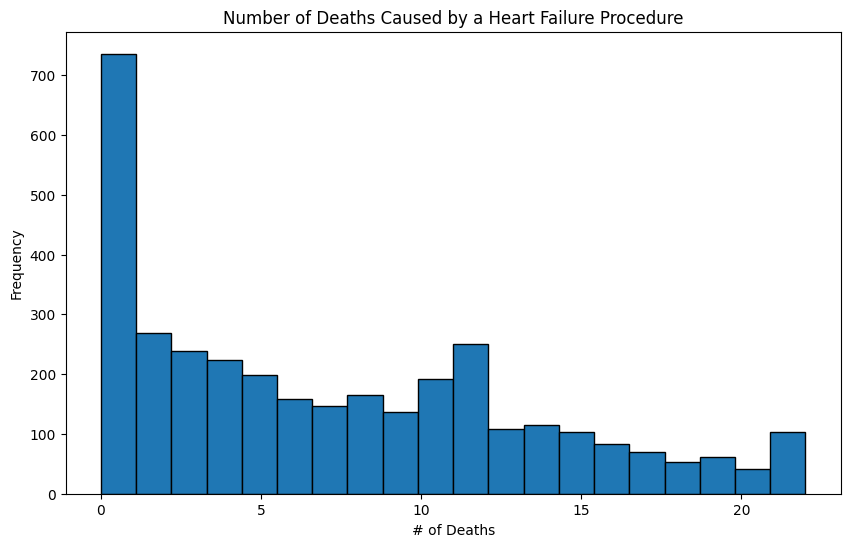

In [15]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Caused by a Heart Failure Procedure')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

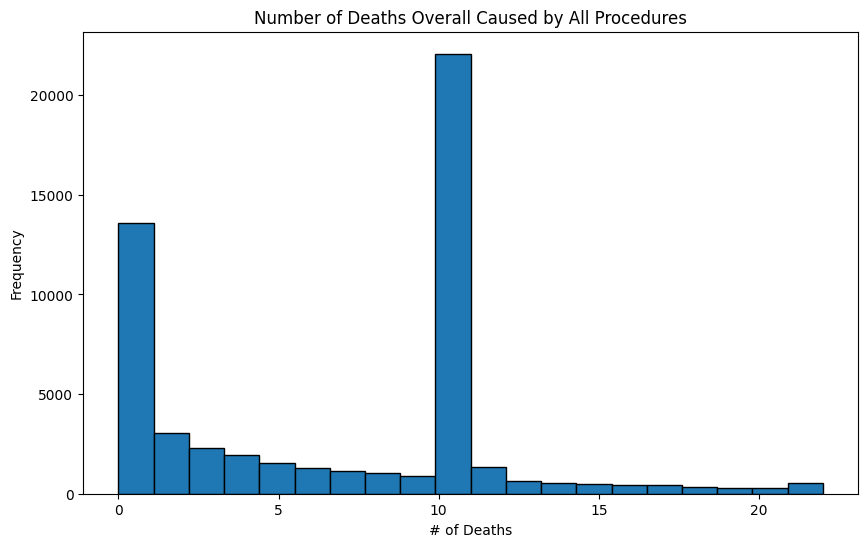

In [16]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Overall Caused by All Procedures')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

### Histogram analysis
From the second histogram, we can see that the most common number of patient deaths due to hospital procedures is $10$ by a large margin. Additionally, from the first histogram, we can see that the distribution of the number of deaths has more spread than the second histogram.

In [17]:
# Calculate the mean of all entries that are not '.' or 'NaN'
wrong_mean = pd.to_numeric(df['# of Deaths'], errors='coerce').mean()
print(f"MEAN WITH OUTLIERS: {wrong_mean}")

MEAN WITH OUTLIERS: 6.789885422240263


The data above shows significant outliers since the mean without outliers ($\approx$7) and the mean with outliers ($\approx$15) are significantly different.

In [18]:
df['HOSPITAL'].value_counts()

HOSPITAL
Alameda Hospital                              180
Sutter Coast Hospital                         180
Barton Memorial Hospital                      180
Marshall Medical Center                       180
Mark Twain Medical Center                     180
                                             ... 
Kaiser Foundation Hospital – Los Angeles        8
Cedars  Sinai Medical Center                    7
Scripps Memorial Hospital – La Jolla            7
Community Regional Medical Center – Fresno      7
Cedars – Sinai Medical Center                   7
Name: count, Length: 530, dtype: int64

From the counts of each hospital above, we can see that some hospitals were very underrepresented ($14$) while many were very overrepresented ($180$).

Since the population mean is not resistant to outliers, we decided to remove all of the outliers in the dataset at the beginning before proceeding with the preliminary data analysis.

## Conclusion 2

In [20]:
df = pd.read_csv("mortrates.csv")
df.head(22)

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
5,2016,AAAA,STATEWIDE,NaN,Acute Stroke Subarachnoid,22.7,644,2833,NaN,NaN,NaN
6,2016,AAAA,STATEWIDE,NaN,Carotid Endarterectomy,0.5,25,4894,NaN,NaN,NaN
7,2016,AAAA,STATEWIDE,NaN,Espophageal Resection,3.9,11,281,NaN,NaN,NaN
8,2016,AAAA,STATEWIDE,NaN,GI Hemorrhage,2.6,1412,54011,NaN,NaN,NaN
9,2016,AAAA,STATEWIDE,NaN,Heart Failure,2.9,2763,95205,NaN,NaN,NaN


In the data above I will take care to filter out the outliers in order to perform a good exploratory data analysis. I will study how different procedures have higher risk mortality. Also I can see that the data above has approximately fifty thousand rows. The different features of the dataset such as the columns which are important are the risk adjusted mortality and the procedure/conditions. The other columns in the future could be used to perform a linear regression. Some procedures/conditions are a lot more rare than others. For example conditions such as stroke are quite common and are over represented in the database. 

As can be seen above, Our dataset has 57652 rows. 

In [21]:
df['# of Cases'] = pd.to_numeric(df['# of Cases'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['Risk Adjuested Mortality Rate'] = pd.to_numeric(df['Risk Adjuested Mortality Rate'], errors='coerce')

df['# of Cases'] = df['# of Cases'].replace('.', 128.3).fillna(128.3).astype(int)    #The number 128.3 was previously calculated 

# Eliminate all outliers

print("Mean # of Cases per procedure per hospital:", df['# of Cases'].mean())

Mean # of Cases per procedure per hospital: 244.60942866063067


            Procedure_Condition  Risk_Adjusted_Mortality_Rate
0         AAA Repair Unruptured                           1.3
1                           AMI                           6.1
2                  Acute Stroke                           9.1
3      Acute Stroke Hemorrhagic                          21.1
4         Acute Stroke Ischemic                           5.0
...                         ...                           ...
57648             GI Hemorrhage                           2.5
57649             Heart Failure                           3.6
57650              Hip Fracture                           4.0
57651                       PCI                           4.3
57653                 Pneumonia                          11.9

[36274 rows x 2 columns]
Mean mortality rate: 5.989289849478966


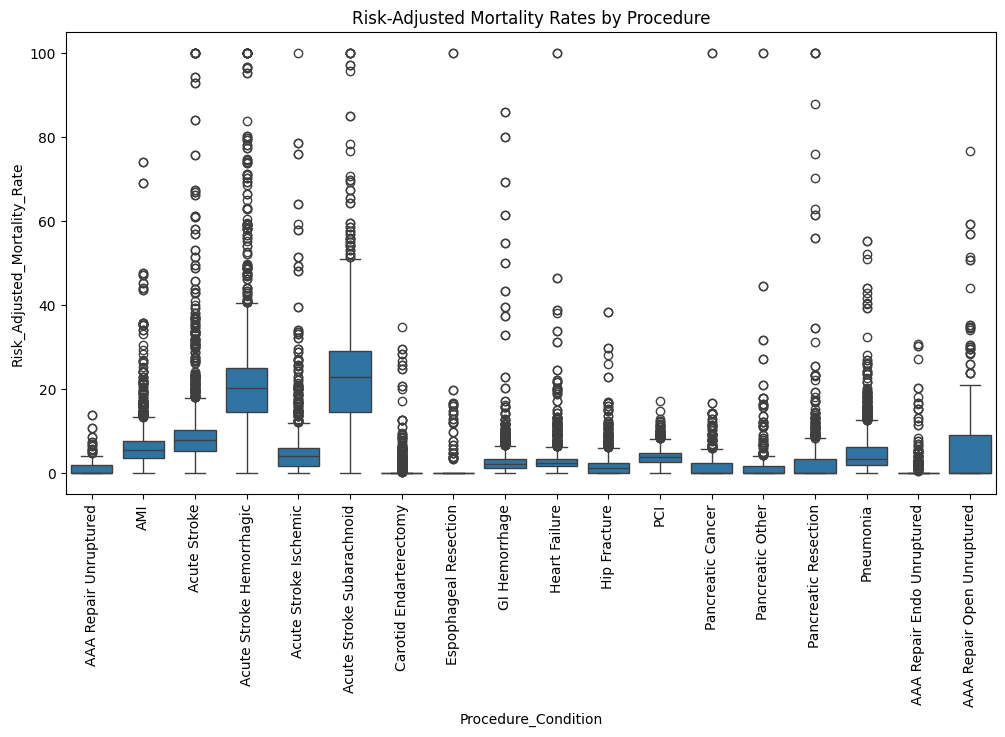

In [22]:

#df['Procedure/Condition'] = df['Procedure/Condition'].dropna()
#df['Risk Adjuested Mortality Rate'] = df['Risk Adjuested Mortality Rate'].dropna()

df_clean = df.dropna(subset=['Procedure/Condition', 'Risk Adjuested Mortality Rate']).copy()


custom_frame = pd.DataFrame({
    "Procedure_Condition": df_clean['Procedure/Condition'],
    "Risk_Adjusted_Mortality_Rate": df_clean['Risk Adjuested Mortality Rate']
})

print(custom_frame)
mortal = custom_frame['Risk_Adjusted_Mortality_Rate'].mean()
print("Mean mortality rate:", mortal)

grouped_by_procedure = custom_frame.groupby("Procedure_Condition")["Risk_Adjusted_Mortality_Rate"].agg(
    ['count', 'mean', 'std']
).reset_index()



plt.figure(figsize=(12, 6))
sns.boxplot(data=custom_frame, x="Procedure_Condition", y="Risk_Adjusted_Mortality_Rate")
plt.xticks(rotation=90) 
plt.title("Risk-Adjusted Mortality Rates by Procedure")
plt.show()

# cabgs.csv conclusion

The *cabgs.csv* file contains a database describing various statistics regarding the impact of Coronary Artery Bypass Graft (CABG) surgery in Californian hospitals between 2018-2022. 

In [23]:
cabgs_df = pd.read_csv("cabgs.csv")
cabgs_df_nan = cabgs_df[cabgs_df.isna().any(axis = 1)] #Get all rows with at least one NaN value in them
display(cabgs_df_nan)

,Year,County,Hospital,Hospital ID,Performance Measure,Total Statewide CABG Cases,Total Statewide CABG Cases for Performance Measure Reporting,Statewide Adverse Events,Statewide Adverse Events Rate (%),Total Hospital CABG Cases,Total Hospital CABG Cases for Performance Measure Reporting,Hospital Adverse Events,Hospital Observed Adverse Events Rate (%),Hospital Expected Adverse Events Rate (%),"Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)",Hospital Lower 95% CI for RAAER,Hospital Upper 95% CI for RAAER,Performance Rating,Longitude,Latitude
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observe that this database only has one **NaN** row, so no rigorous data cleaning is required here (for now). We may remove the **NaN** row, and it will suffice.

In [24]:
nan_row = cabgs_df_nan.index.to_list()[0]
cabgs_df = cabgs_df.drop(index = nan_row)
cabgs_df

,Year,County,Hospital,Hospital ID,Performance Measure,Total Statewide CABG Cases,Total Statewide CABG Cases for Performance Measure Reporting,Statewide Adverse Events,Statewide Adverse Events Rate (%),Total Hospital CABG Cases,Total Hospital CABG Cases for Performance Measure Reporting,Hospital Adverse Events,Hospital Observed Adverse Events Rate (%),Hospital Expected Adverse Events Rate (%),"Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)",Hospital Lower 95% CI for RAAER,Hospital Upper 95% CI for RAAER,Performance Rating,Longitude,Latitude
0,2022,Alameda,Alta Bates Summit Medical Center,106010937.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,151,130,4,3.08,3.35,2.26,0.62,5.79,Average,-122.26,37.82
1,2022,Alameda,Washington Hospital – Fremont,106010987.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,91,83,2,2.41,2.05,2.90,0.35,10.46,Average,-121.98,37.56
2,2022,Alameda,Stanford Health Care Tri-Valley,106014050.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,94,71,1,1.41,2.26,1.53,0.04,8.55,Average,-121.88,37.69
3,2022,Butte,Enloe Medical Center– Esplanade,106040962.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,127,94,4,4.26,2.93,3.57,0.97,9.13,Average,-121.85,39.74
4,2022,Contra Costa,John Muir Medical Center – Concord Campus,106071018.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,280,244,1,0.41,2.76,0.37,0.01,2.03,Better,-122.04,37.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2018-2019,Tulare,Kaweah Delta Medical Center,106540734.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,455,352,48,13.64,13.81,12.00,8.85,15.91,Average,-119.29,36.33
1457,2018-2019,Ventura,Community Memorial Hospital - San Buenaventura,106560473.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,170,129,9,6.98,9.99,8.48,3.88,16.10,Average,-119.26,34.27
1458,2018-2019,Ventura,Los Robles Hospital and Medical Center,106560492.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,165,113,19,16.81,12.33,16.57,9.98,25.87,Average,-118.89,34.21
1459,2018-2019,Ventura,St. John's Regional Medical Center,106560529.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,140,100,24,24.00,15.21,19.17,12.28,28.53,Worse,-119.16,34.22


The *cabgs.csv* database contains a column "Performance Measure" describing 4 different performance ratings for different **adverse events**:
* **Isolated CABG Operative Mortality**: The percentage of CABG surgery patients who died during/after a CABG surgery **only**
* **CABG+Valve Operative Mortality**: The percentage of CABG surgery patients who died during/after a CABG and heart valve surgery **together**
* **Isolated CABG Post-Operative Stroke**: The percentage of CABG surgery patients who suffered from stroke after a CABG surgery
* **Isolated CABG 30-day Readmission**: The percentage of CABG surgery patients who were readmitted to a hospital within 30 days of their CABG surgery

In [25]:
display(cabgs_df["Performance Measure"].value_counts())

Performance Measure
Isolated CABG 30-Day Readmission       368
CABG+Valve Operative Mortality         366
Isolated CABG Post-Operative Stroke    366
Isolated CABG Operative Mortality      361
Name: count, dtype: int64

The database then includes the following columns:
* **Year**: The year or year range being studied
* **County**: The county in which the given hospital is located
* **Hospital**: The name of the given hospital
* **Hospital ID**: The ID of the given hospital
* **Total Statewide CABG Cases**: The total number of CABG cases in total for that year range
* **Total Statewide CABG Cases for Performance Measure Reporting**: The total number of CABG cases included in the performance rating for the given performance measure for that year range
* **Statewide Adverse Events**: The number of occurences of the given adverse event statewide
* **Statewide Adverse Events Rate (%)**: The percentage rate at which the adverse event occurred statewide among all CBDG patients
* **Similar metrics to the above, but hospital-wide instead of statewide**
* **Hospital Observed/Expected Adverse Events Rate (%)**: The actual/expected rate of the adverse event occuring for CABG surgery patients at a given hospital
* **Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)**: The above, but adjusted for risk
* **Hospital Lower/Upper 95% CI for RAAER**: The lower and upper bounds for the adverse event rates for hospitals within a 95% confidence interval
* **Performance Rating**: The performance rating for the hospital ("average," "worse," etc.)
* **Longitude/Latitude**: The latitude/longitude coordinates of the given hospital

A key feature of this dataset is "performance measure," which measures the risks of a variety of adverse events. The dataset also includes significant information about the geolocation of the hospitals it contains, including their latitude, longitude, and the county they are in.

Hence, it is worthwhile to study whether there is a correlation between the location of hospitals and their performance measure for certain given adverse events for CABG surgery. Knowing this will suggest whether certain locations in California are at risk for adverse events relating to the operation.

Specifically, we want to examine **whether certain counties in California contain hospitals that feature higher rates for adverse events, on average, compared to other counties**.

To examine this claim, we perform a **one-way ANOVA test** with a significance level **$\alpha$ = 0.05**:
* $H_0$: Across **major** counties in California, the average rate of adverse events in the county **is the same.**
* $H_A$: There is **at least one county** in California where its average rate of adverse events across hospitals in the county **is different** from the averages of other counties.

However, observe:

In [26]:
display(cabgs_df["County"].value_counts())

County
Los Angeles        439
Orange             143
San Diego          106
Santa Clara         84
San Bernardino      72
Riverside           60
Sacramento          48
San Francisco       43
Ventura             37
San Mateo           36
Fresno              36
Kern                36
Alameda             36
Napa                24
Stanislaus          24
Santa Barbara       24
Shasta              24
San Joaquin         24
Monterey            24
Sonoma              20
Contra  Costa       16
Yuba                13
Santa Cruz          12
Marin               12
Humboldt            12
Butte               12
Solano              12
San Luis Obispo     12
Tulare              12
Contra Costa         8
Name: count, dtype: int64

We notice that the sample size ranges between each of the county categories varies very differently. This will make ANOVA a less effective statistical method. Therefore, when doing the grouping, we choose only counties with over 50 datapoints and discard the rest of the counties. This will ensure that our ANOVA test returns a more accurate result.

We can now proceed with performing ANOVA. First, we must convert the "Hospital Observed Adverse Events Rate (%)" into a numeric column. This column may contain invalid values when converting to a numeric column, so we treat them as NaN values, then extract them out of the final dataframe:

In [27]:
cabgs_df["Hospital Observed Adverse Events Rate (%)"] = pd.to_numeric(cabgs_df["Hospital Observed Adverse Events Rate (%)"], errors = "coerce")
cabgs_df = cabgs_df[~cabgs_df["Hospital Observed Adverse Events Rate (%)"].isna()]
cabgs_df = cabgs_df.copy() #For error suppression
cabgs_df["risk_rates"] = cabgs_df["Hospital Observed Adverse Events Rate (%)"]

**cabgs_df** is now updated to contain the converted numeric values in the "risk_rates" column, which is just an alias for the "Hospital Observed Adverse Events Rate (%)" column.

We now group and extract the relevant data:

In [28]:
cabgs_ca_valve = cabgs_df
ca_valve_group = cabgs_ca_valve.groupby(["County"])
county_order = []
samples = [] #These are the samples that will be passed into ANOVA
for county, county_df in ca_valve_group:
    if county_df.shape[0] < 50:
        continue
    county_order.append(county[0])
    risk_rate_list = county_df["risk_rates"].tolist()
    samples.append(risk_rate_list)
print(county_order)

['Los Angeles', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'Santa Clara']


This groups the dataframe by county. While iterating through the group, any dataframes with less than 50 entries are discarded. The risk_rates column is then retrieved, and added to the samples list.

Before we run ANOVA, notice that the sample sizes for each county are very different. For ANOVA, this is fine, unless the samples have different variances.

To check that each sample has the same variance, we run a quick Levene test, with the following hypotheses and $\alpha = 0.05$:
* $H_0$: All county samples have the same variance
* $H_A$: At least one of the county sample has a different variance from the others

In [29]:
f_stat, pvalue_levene = stats.levene(*samples)
print("p-value: {pvalue}".format(pvalue = pvalue_levene))

p-value: 0.03820010962198781


Since the p-value is less than $\alpha = 0.05$, we accept the null hypothesis of the Levene test, and so all county samples have the same variance.

Now that we verified equal variances among the samples, we run the original ANOVA test

In [30]:
f_stat, pvalue_anova = stats.f_oneway(*samples)
print("p-value: {pvalue}".format(pvalue = pvalue_anova))

p-value: 0.06533989753307722


Since the p-value is greater than $\alpha = 0.05$ we cannot reject the null hypothesis and accept the alternative hypothesis. Therefore there is a county in California where its average rate of adverse events across hospitals in the county is different from the averages of other counties.

We now plot, on a **box and whisker plot**, the observed adverse event rates for major counties in California:

Text(0, 0.5, 'County')

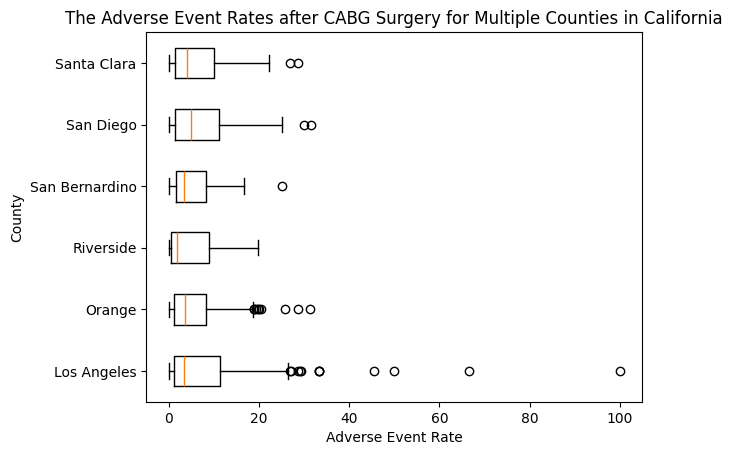

In [31]:
plt.boxplot(samples, tick_labels=county_order, vert = False)
plt.title("The Adverse Event Rates after CABG Surgery for Multiple Counties in California")
plt.xlabel("Adverse Event Rate")
plt.ylabel("County")

As a post-hoc test, we also can run Tukey's Post-Hoc test with $\alpha = 0.05$ to identify the county that is causing the difference:
* $H_0$: The two counties being compared have no difference in their means (average adverse event rate)
* $H_A$: The two counties being compared have different means 

In [32]:
pvalue_tukey = pd.DataFrame(stats.tukey_hsd(*samples).pvalue)
display(pvalue_tukey)

,0,1,2,3,4,5
0,1.000000,0.320846,0.327454,0.497435,0.995515,0.994209
1,0.320846,1.000000,0.995001,0.999978,0.358416,0.929752
2,0.327454,0.995001,1.000000,0.999541,0.301209,0.802988
3,0.497435,0.999978,0.999541,1.000000,0.448804,0.923342
4,0.995515,0.358416,0.301209,0.448804,1.000000,0.962114
5,0.994209,0.929752,0.802988,0.923342,0.962114,1.000000


But notice that most of the p-values are far greater than $\alpha$, and so Tukey's does not yield statistically significant results.